In [3]:
import pandas as pd
file_path = "C:/Users/Toluwanimi.Oderinde/Documents/food.csv"
data = pd.read_csv(file_path)


In [5]:
print(data.head(10))


   order_id  customer_id            restaurant_name   cuisine_type  \
0   1477147       337525                    Hangawi         Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya       Japanese   
2   1477070        66393                Cafe Habana        Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken       American   
4   1478249        76942           Dirty Bird to Go       American   
5   1477224       147468           Tamarind TriBeCa         Indian   
6   1477894       157711          The Meatball Shop        Italian   
7   1477859        89574                  Barbounia  Mediterranean   
8   1477174       121706         Anjappar Chettinad         Indian   
9   1477311        39705              Bukhara Grill         Indian   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2      

In [6]:
print(data.dtypes)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


In [10]:
def null_rate(col):
    null_count = col.isna().sum()
    total_count = len(col)
    return null_count/total_count * 100

print(data.apply(null_rate))

order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64


In [11]:
print(data.nunique())

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64


In [14]:
data['total time'] = data['food_preparation_time'] + data['delivery_time']

In [46]:
cuisine_types = data['cuisine_type'].unique()
print (cuisine_types)

['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


In [17]:
num_restaurants = data.groupby('cuisine_type')['restaurant_name'].nunique()

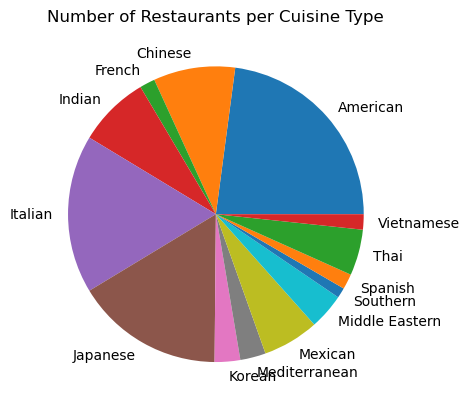

In [18]:
import matplotlib.pyplot as plt

plt.pie(num_restaurants, labels=num_restaurants.index)
plt.title('Number of Restaurants per Cuisine Type')
plt.show()

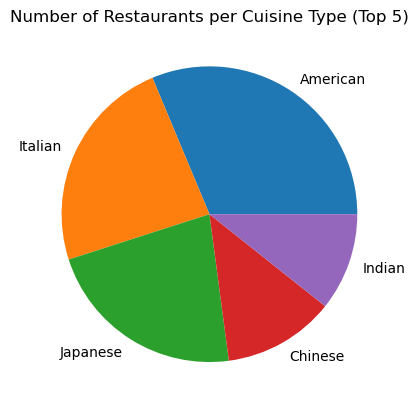

In [19]:
top_5_cuisine = num_restaurants.nlargest(5)
plt.pie(top_5_cuisine, labels=top_5_cuisine.index)
plt.title('Number of Restaurants per Cuisine Type (Top 5)')
plt.show()



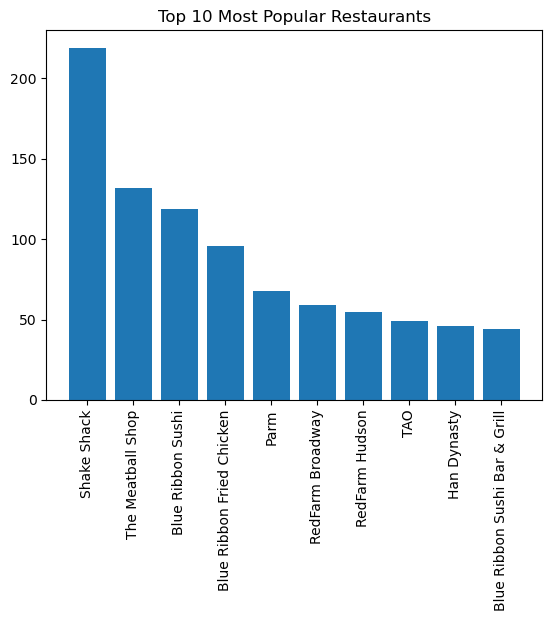

In [22]:
popular_restaurants = data['restaurant_name'].value_counts().nlargest(10)
plt.bar(popular_restaurants.index, popular_restaurants.values)
plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Restaurants')
plt.show()

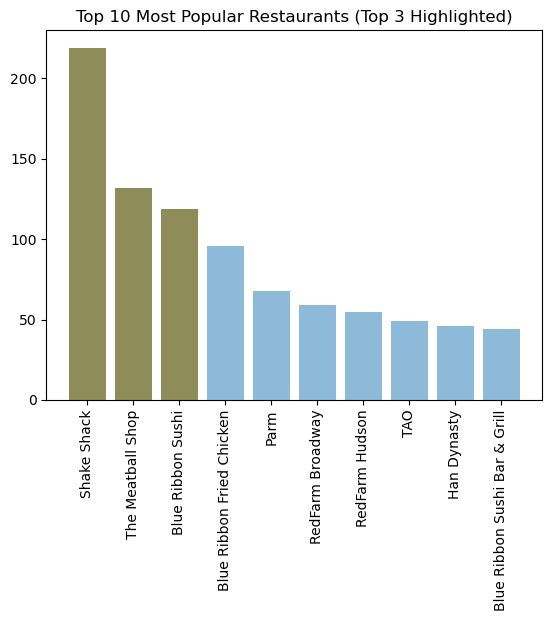

In [23]:
top_3 = popular_restaurants.nlargest(3)
plt.bar(top_3.index, top_3.values, color='orange')
plt.bar(popular_restaurants.index, popular_restaurants.values, alpha=0.5)
plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Restaurants (Top 3 Highlighted)')
plt.show()

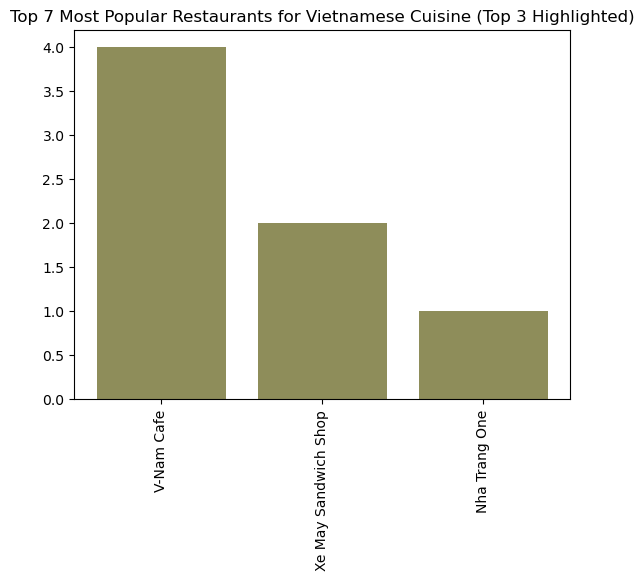

In [39]:
max_restaurants = 10
for cuisine in cuisine_types:
    subset = data[data['cuisine_type'] == cuisine]
    if len(subset) < max_restaurants:
        max_restaurants = len(subset)
        popular_restaurants = subset['restaurant_name'].value_counts().nlargest(max_restaurants)
        top_3 = popular_restaurants.nlargest(3)
        plt.bar(top_3.index, top_3.values, color='orange')
        plt.bar(popular_restaurants.index, popular_restaurants.values, alpha=0.5)
        plt.xticks(rotation=90)
        plt.title(f'Top {max_restaurants} Most Popular Restaurants for {cuisine} Cuisine (Top 3 Highlighted)')
        plt.show()

In [72]:
shake_shack_reviews = data[data['restaurant_name']=='Shake Shack']['rating']
proportion = (shake_shack_reviews.count() / data['rating'].count()) * 100
print('Proportion of reviews for Shake Shack: {:.2f}%'.format(proportion))

Proportion of reviews for Shake Shack: 11.54%


In [3]:
import seaborn as sns

data_ratings_prep_time = data[['rating', 'food_preparation_time']]


NameError: name 'data' is not defined